# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
# 轉換出生日為出生年
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_train['YEARS_BIRTH']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: YEARS_BIRTH, Length: 307511, dtype: float64

<AxesSubplot:>

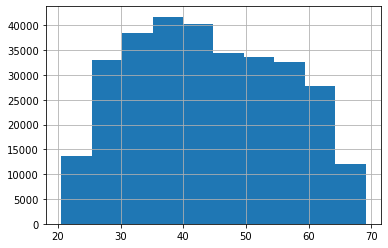

In [8]:
# 看一下出生年的資料分布情形，很好沒有離群值
app_train['YEARS_BIRTH'].hist()

In [32]:
# 先看一下出生年與目標之間的相關係數，看起來是負相關，而且幾乎沒什麼相關，但沒關係還是拿來練習
print('Correlation between YEARS_BIRTH and TARGET:', app_train['YEARS_BIRTH'].corr(app_train['TARGET']))

Correlation between YEARS_BIRTH and TARGET: -0.07823930830984539


In [35]:
# 另外再設一個 dataframe 裝 'YEARS_BIRTH', 'TARGET' 這兩個資料，這樣就能只觀察這兩個資料
age_data = app_train[['YEARS_BIRTH', 'TARGET']]
age_data.head(10)

,YEARS_BIRTH,TARGET
0,25.920548,1
1,45.931507,0
2,52.180822,0
3,52.068493,0
4,54.608219,0
5,46.413699,0
6,37.747945,0
7,51.643836,0
8,55.065753,0
9,39.641096,0


In [40]:
# 將 YEARS_BIRTH 的資料作離散化，由先前的 hist 圖可以觀察到最大最小值，所以將資料從20~70每5做一個切割
age_data['equal_width_YEARS_BIRTH'] = pd.cut(age_data['YEARS_BIRTH'], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
age_data['equal_width_YEARS_BIRTH'].value_counts() # 看看每個區間裡有多少個資料

<ipython-input-40-2ec0a66eeb91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['equal_width_YEARS_BIRTH'] = pd.cut(age_data['YEARS_BIRTH'], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])


(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(20, 25]    12159
(65, 70]     8103
Name: equal_width_YEARS_BIRTH, dtype: int64

In [38]:
age_data.head(10) # 抓前 10個資料出來觀察

,YEARS_BIRTH,TARGET,equal_width_YEARS_BIRTH
0,25.920548,1,"(25, 30]"
1,45.931507,0,"(45, 50]"
2,52.180822,0,"(50, 55]"
3,52.068493,0,"(50, 55]"
4,54.608219,0,"(50, 55]"
5,46.413699,0,"(45, 50]"
6,37.747945,0,"(35, 40]"
7,51.643836,0,"(50, 55]"
8,55.065753,0,"(55, 60]"
9,39.641096,0,"(35, 40]"


In [42]:
# 將資料做分群，並計算每個群裡對應的　YEARS_BIRTH　與　YEARS_BIRTH　的平均值
# 例如20~25歲的族群哩，平均年齡是23.3歲，不還款的機率是0.12 x 100 = 12%
age_groups  = age_data.groupby('equal_width_YEARS_BIRTH').mean()
age_groups

,YEARS_BIRTH,TARGET
equal_width_YEARS_BIRTH,,
"(20, 25]",23.377522,0.123036
"(25, 30]",27.822518,0.111436
"(30, 35]",32.479037,0.102814
"(35, 40]",37.555913,0.089414
"(40, 45]",42.459346,0.078491
"(45, 50]",47.462741,0.074171
"(50, 55]",52.593136,0.066968
"(55, 60]",57.491131,0.055314
"(60, 65]",62.412459,0.052737


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


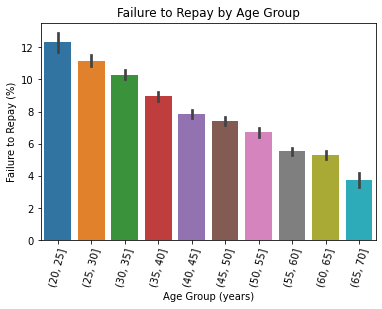

In [43]:
import seaborn as sns # 另一個繪圖-樣式套件
px = age_data['equal_width_YEARS_BIRTH']
py = age_data['TARGET']*100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');
# 由此長條圖可以看出年齡越大，不還款的機率就越低，反之年輕的人不還款機率高，那銀行還一直打給我問要不要貸款？